In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math
from sympy import symbols, Eq, solve


Vi opstiller modellen med lignigerne: 

$$ IS: \hspace{2cm} y_t - \overline{y} = \alpha_1(g-\overline{g}) - \alpha_2(r-\overline{r}) - \alpha_3(\tau - \overline{\tau})$$
$$ MP: \hspace{2cm} i_t^p = \pi_{t+1}^e + \overline{r} + h(y-\overline{y}) + b(\pi - \pi^*) $$
$$ AS: \hspace{2cm} y_t - \overline{y} = \gamma(\pi - \pi^*)$$
$$ IE: \hspace{2cm} \pi^e_{t+1} = \pi_t $$

In [42]:
#Definerer eksogene variable:
alpha1 = 1
alpha2 = 1
alpha3 = 1
v = 0
gamma = 1.5
h = 0.5
b = 5
tau = 1
taubar = 1
g = 1
gbar = 1
ybar = 1
pibar = 1

pi_exp = pibar

#Sætter antallet af simulationer i modellen:
simstørrelse = 1000


#Definerer tidsserien:
data = pd.DataFrame()
data['tid'] = range(0,1000)


# Modellen
Modellen opstilles, og AS-AD-kurverne illustreres med ligevægt uden stød

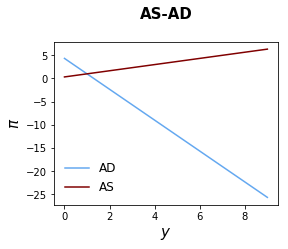

In [43]:
#Opstiller selve modellen:

def AS(ybar,pi,pi_exp,gamma):
    y = ybar + (1/gamma)*(pi-pi_exp)
    return y

def AD(ybar,pi,pibar,alpha1,g,gbar,alpha2,alpha3,h,b,tau,taubar):
    y = ybar + (alpha1/(1+alpha2*h))*(g-gbar) -(alpha2*b/(1+alpha2*h))*(pi-pibar) -(alpha3/(1+alpha2*h))*(tau-taubar) + (1/(1+alpha2*h))*v
    return y



AS_liste = []
for i in range(0,10):
    AS_liste.append(AS(ybar,i,pi_exp,gamma))

AD_liste = []
for i in range(0,10):
    AD_liste.append(AD(ybar,i,pibar,alpha1,g,gbar,alpha2,alpha3,h,b,tau,taubar))



fig, ax1 = plt.subplots(figsize=(4,3))
plt.title('AS-AD',fontsize=15,weight='bold',pad=23)
goldman_blue = '#64a8f0'
plt.plot(AD_liste, label = 'AD', c=goldman_blue)
plt.plot(AS_liste, label = 'AS', c='maroon')

plt.xlabel('$y$',fontsize=15)
plt.ylabel('$\pi$',fontsize=15)

#ax1.set_xlim(0,10)
#ax1.set_ylim(0,10)


plt.legend(frameon=False,fontsize=12)

plt.savefig('AS-AD.pdf')

In [44]:
#Endogeniserer ybar (strukturel BNP), lader den stige á la Solow. Startværdien er den givne i definitionen af eksogene variable.
#Laves som en random walk med drift
drift = 0.03
y_bar = [1]
for i in range(1,simstørrelse):
    s = np.random.normal(loc=0,scale=0,size=None)
    y_bar.append(
        y_bar[i-1] + drift
    )
data['ybar'] = pd.DataFrame(y_bar)
data

,tid,ybar
0,0,1.00
1,1,1.03
2,2,1.06
3,3,1.09
4,4,1.12
...,...,...
995,995,30.85
996,996,30.88
997,997,30.91
998,998,30.94


# Ligevægt
Modellen løses ved løsning af ligevægten

In [45]:
#Finder equilibrium:
y_løsninger = []
pi_løsninger = []
v_vektor = [0]

#Definerer støddet v (udbudsstød) - Og samtidig perioderne, simulationen skal køre over. 
for i in range(1,simstørrelse):
    s = np.random.normal(loc=0, scale=0.3, size=None)
    v_vektor.append(
            v_vektor[i-1] + s
            )

#Løser AS-AD-ligningerne mht. inflation og output
for i in range(0,simstørrelse):
    pi, y = symbols('pi y')
    eq1 = Eq(data['ybar'][i] + (1/gamma)*(pi-pi_exp) + v_vektor[i]/gamma - y)
    eq2 = Eq(data['ybar'][i] + (alpha1/(1+alpha2*h))*(g-gbar) -(alpha2*b/(1+alpha2*h))*(pi-pibar) -(alpha3/(1+alpha2*h))*(tau-taubar) + (1/(1+alpha2*h)*0 - y))

    løsning = solve((eq1,eq2), (pi,y))
    pi_løsninger.append(løsning[pi])
    y_løsninger.append(løsning[y])
    pi_exp = løsning[pi]

data['y_løs'] = pd.DataFrame(y_løsninger)
data['pi_løs'] = pd.DataFrame(pi_løsninger)


#Regner inflations- og outputgab:
outputgab = [0]
for i in range(1,len(data['y_løs'])):
    outputgab.append(data['y_løs'][i] - data['ybar'][i])

inflationsgab = [0]
for i in range(1,len(data['pi_løs'])):
    inflationsgab.append(data['pi_løs'][i] - pibar)

data['outputgab'] = outputgab
data['inflationsgab'] = inflationsgab


# Illustration:

1000 1000 1000


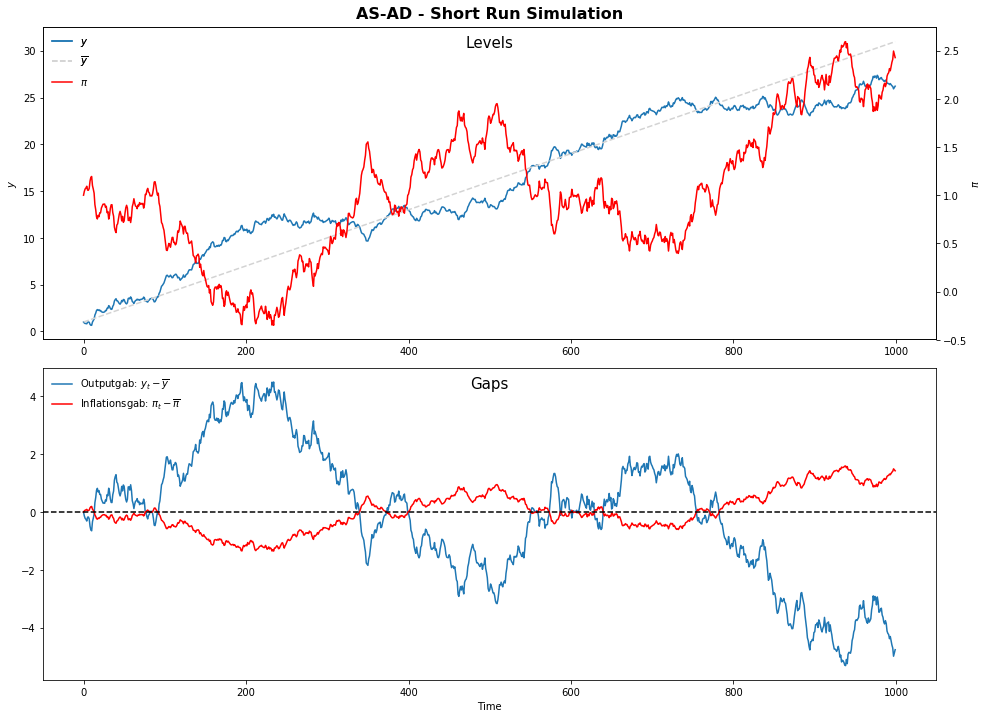

In [46]:
#Laver figuren:
fig = plt.figure(figsize=(16,12), frameon=False)
title_font = {'size':'16', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'}
plt.title('AS-AD - Short Run Simulation',**title_font)
plt.axis('off')

#Laver figur 1
ax = fig.add_subplot(4,1,(1,2))
plt.title('Levels',fontsize=15,weight='normal',pad=-20)
plt.plot(data['y_løs'], label = '$y$')
plt.plot(data['ybar'], label = '$\overline{y}$', c='lightgrey', linestyle='--')
plt.ylabel('$y$')
legend1 = plt.legend(loc = 'upper left', frameon=False)

ax2 = ax.twinx()
plt.plot(data['pi_løs'], label = '$\pi$',c='r')
plt.tick_params()
plt.ylabel('$\pi$', )
legend2 = plt.legend(loc = 'upper left', frameon=False,bbox_to_anchor=(0,0.87))
ax.add_artist(legend1)


#Laver figur 2:
ax = fig.add_subplot(4,1,(3,4))
plt.title('Gaps',fontsize=15,weight='normal',pad=-20)
plt.plot(data['outputgab'], label = 'Outputgab: $y_t - \overline{y}$')
plt.plot(data['inflationsgab'],c='r', label = 'Inflationsgab: $\pi_t - \overline{\pi}$')
ax.axhline(0,linestyle='--',c='black')
plt.legend(frameon=False,loc='upper left',bbox_to_anchor=(0,1))
plt.xlabel('Time')

plt.savefig('Simulation.pdf')
print(len(v_vektor),len(y_løsninger),len(data['y_løs']))